In [32]:
%reload_ext autoreload
%autoreload 2

from pathlib import Path
import sys 

project_root = Path().cwd()
scripts_dir = project_root / "src" / "scripts"
sys.path.insert(0, str(scripts_dir))

import numpy as np 
import scipy.stats as stats
import scipy.io as sio
import os 
import matplotlib.pyplot as plt 
import seaborn as sns
import process_2p as p2p
import lick_behav_analysis as behav

# Recording parameters
fps = 15
framespertrial = 375 
ms_per_frame = int(1000//fps)
reward_frame = 150
cue_frame = 105
trials = 30
cmap = "bwr"

In [19]:
folder = '/Users/savani/Downloads/2p_data/fasted sucrose water'
f_suc, f_w, base_suc, base_w, aligned_suc, aligned_w = p2p.process_2p_folder_mt(folder, n_trials = 50)

In [22]:
f_suc.shape

(163, 225)

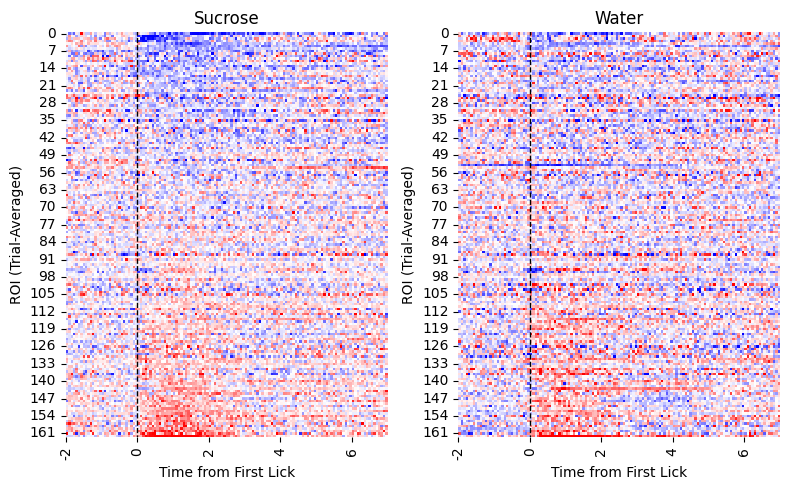

In [31]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(8, 5))
ascending_order = np.argsort(np.nanmean(f_suc[:, 75:105], axis=1))
sorted_avg_mean = f_suc[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax, vmin=0.8, vmax=1.2, cmap='bwr', cbar= False)
ax.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax.set_xticks(np.arange(15, 255, 15)[::2])
ax.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax.set_ylabel("ROI (Trial-Averaged)")
ax.set_xlabel("Time from First Lick")
ax.set_xlim(left = 45, right = 180)
ax.set_title("Sucrose")

sorted_avg_mean = f_w[ascending_order, :]
sns.heatmap(sorted_avg_mean, ax = ax2, vmin=0.8, vmax=1.2, cmap='bwr', cbar = False)
ax2.vlines(x = 75, ymin = -1, ymax = f_suc.shape[0] + 1, color = 'black', linestyle = '--', lw = 1)
ax2.set_xticks(np.arange(15, 255, 15)[::2])
ax2.set_xticklabels((np.arange(15, 255, 15)/15).astype(int)[::2]-5)
ax2.set_ylabel("ROI (Trial-Averaged)")
ax2.set_xlabel("Time from First Lick")
ax2.set_xlim(left = 45, right = 180)
ax2.set_title("Water")
fig.tight_layout()